In [3]:
# potrebne knjiznice
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [2]:
# uvoz podatkov
data_A = pd.read_csv("SEEDS_TP_A+_A-.csv", index_col=0).iloc[1:,:]
data_A = data_A.apply(pd.to_numeric)
data_A.index = pd.to_datetime(data_A.index, format="%d/%m/%Y %H:%M")
data_A.index = pd.date_range(start=data_A.index[0], periods=len(data_A), freq="15T")
data_A.columns

# 1 mesec, 2 dni za napoved
df = data_A[(data_A["TP BENCINSKI SERVIS 3 2781_A+_401"].index >= "2023-02-01") &
                (data_A["TP BENCINSKI SERVIS 3 2781_A+_401"].index < "2023-03-03")][["TP BENCINSKI SERVIS 3 2781_A+_401"]]
df["time"] = df.index
df["id"] = 2 # mesec
df.columns = ["moc", "time", "id"]

In [23]:
data = data_A[["TP BENCINSKI SERVIS 3 2781_A+_401"]]
data["time"] = data.index
data.columns = ["moc", "time"]

/var/folders/bv/jzlzr1zd4z7bc7wnb1vbjb5w0000gn/T/ipykernel_56277/3789689427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time"] = data.index


# ARMA modeling

Text(0.5, 0.98, 'Prikaz podatkov TP BENCINSKI SERVIS 3 2781_A+_401 - MOČ, obdobje 01.02.2023-01.03.2023')

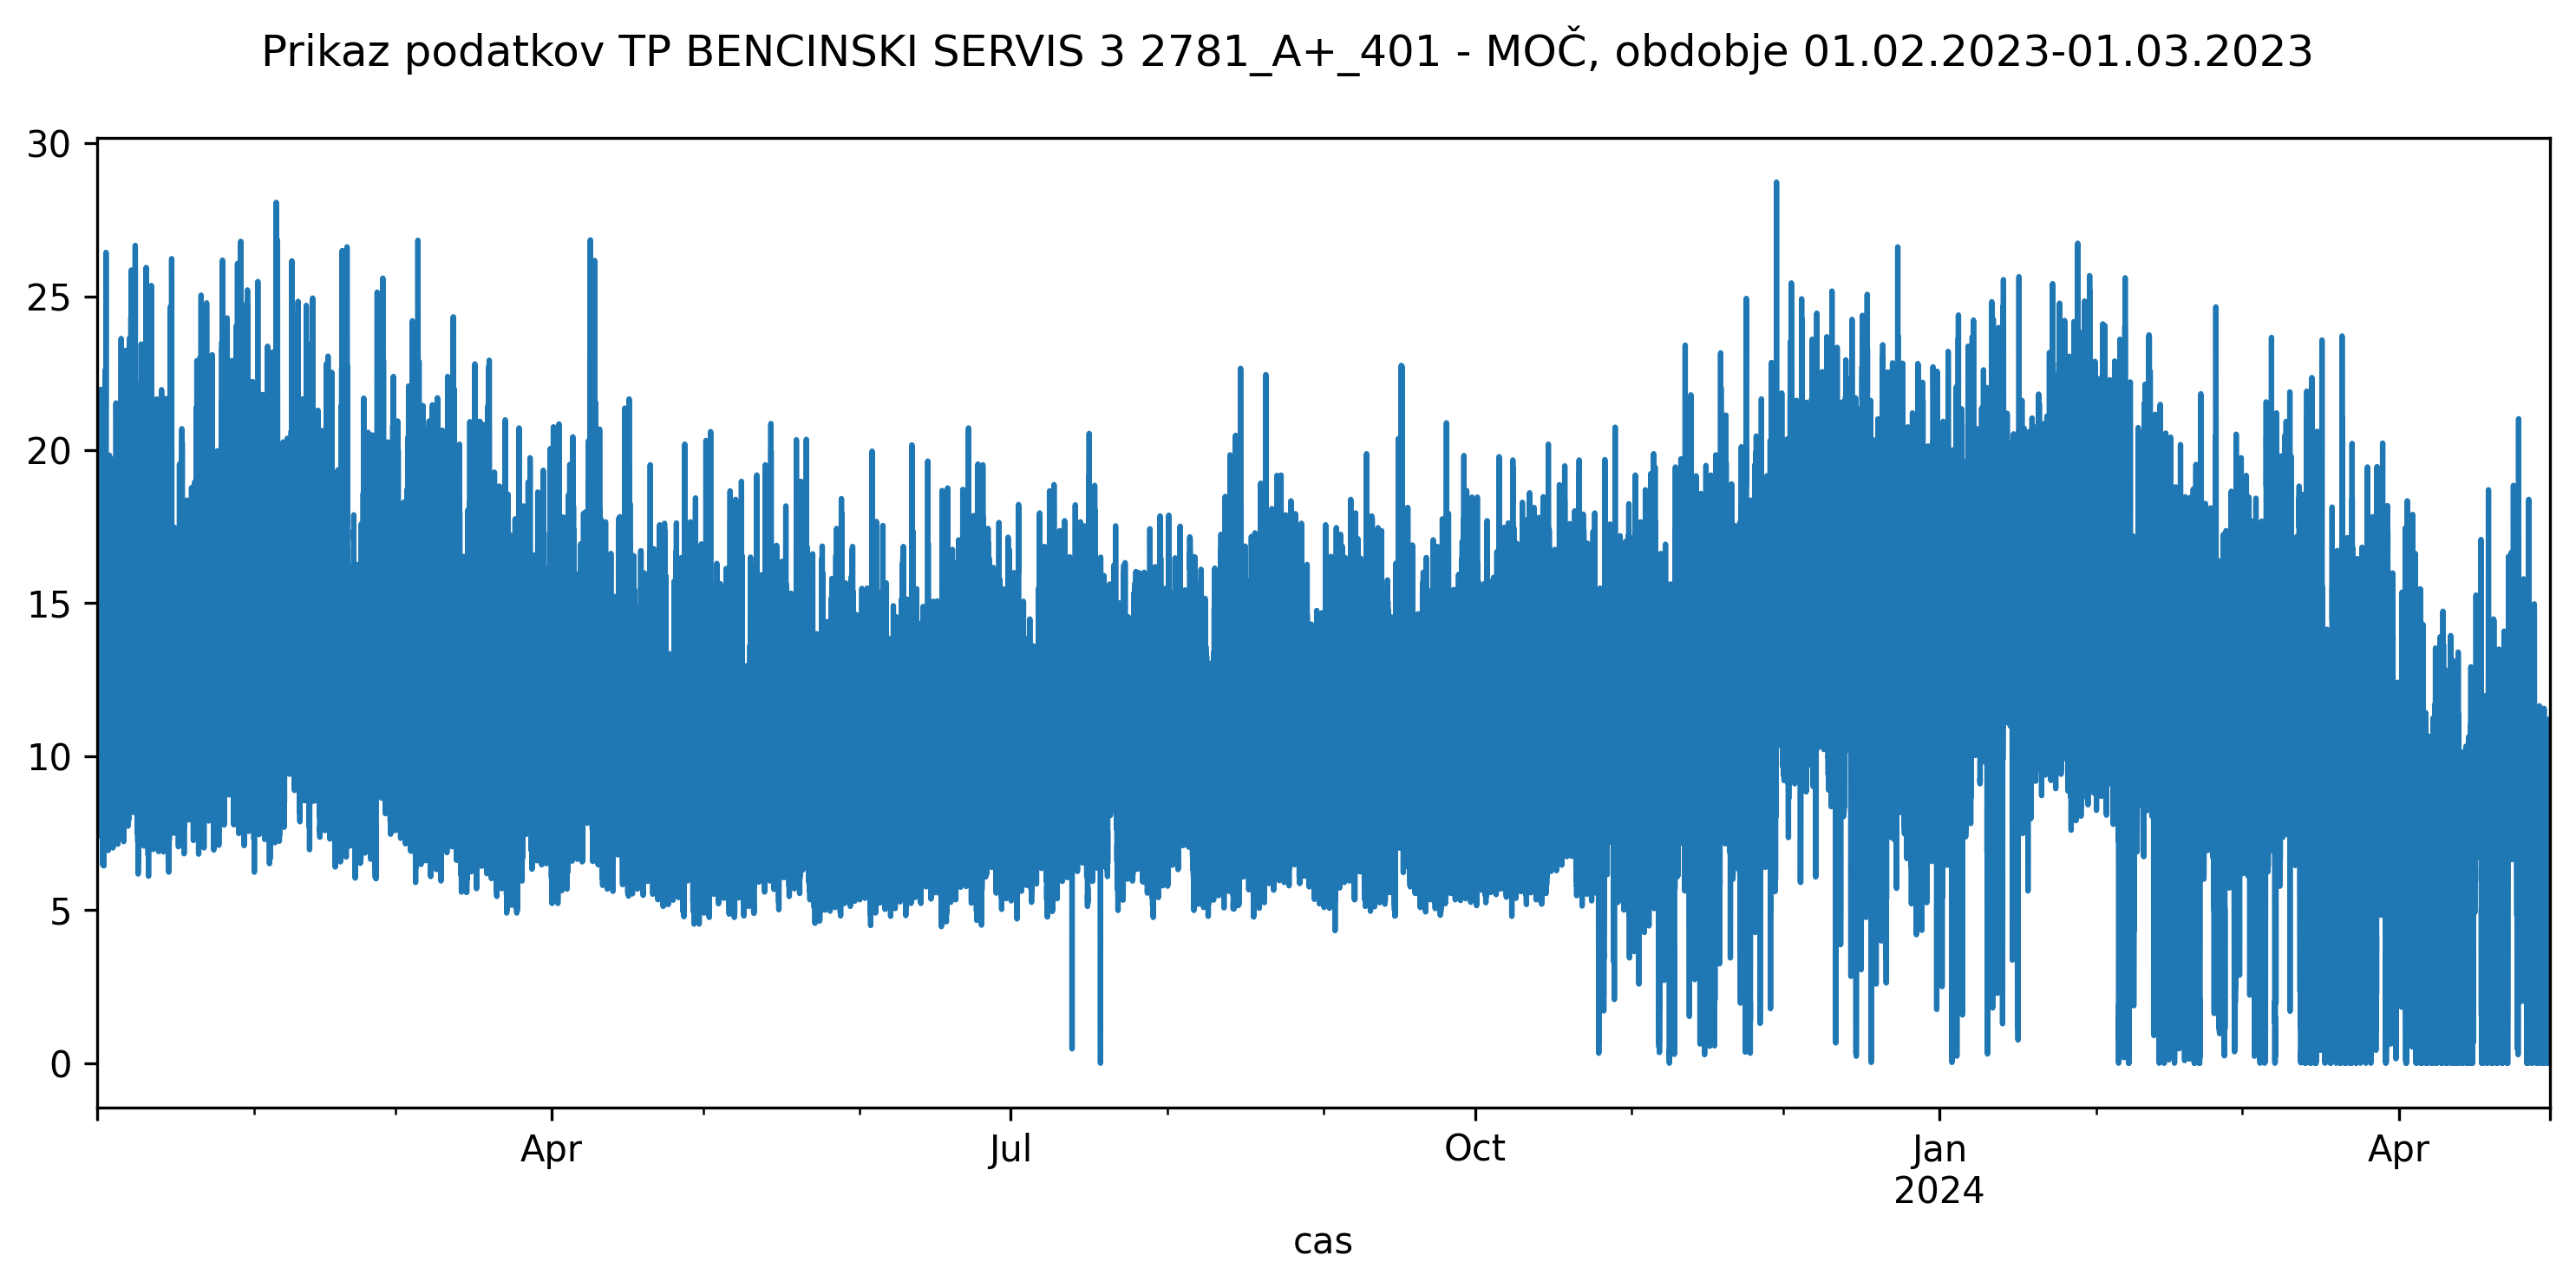

In [24]:
fig = plt.figure(num=None, figsize=(10, 5), dpi=300, tight_layout=True)
y = data['moc']
y.plot()
plt.xlabel('cas')
fig.suptitle('Prikaz podatkov TP BENCINSKI SERVIS 3 2781_A+_401 - MOČ', fontsize=12)

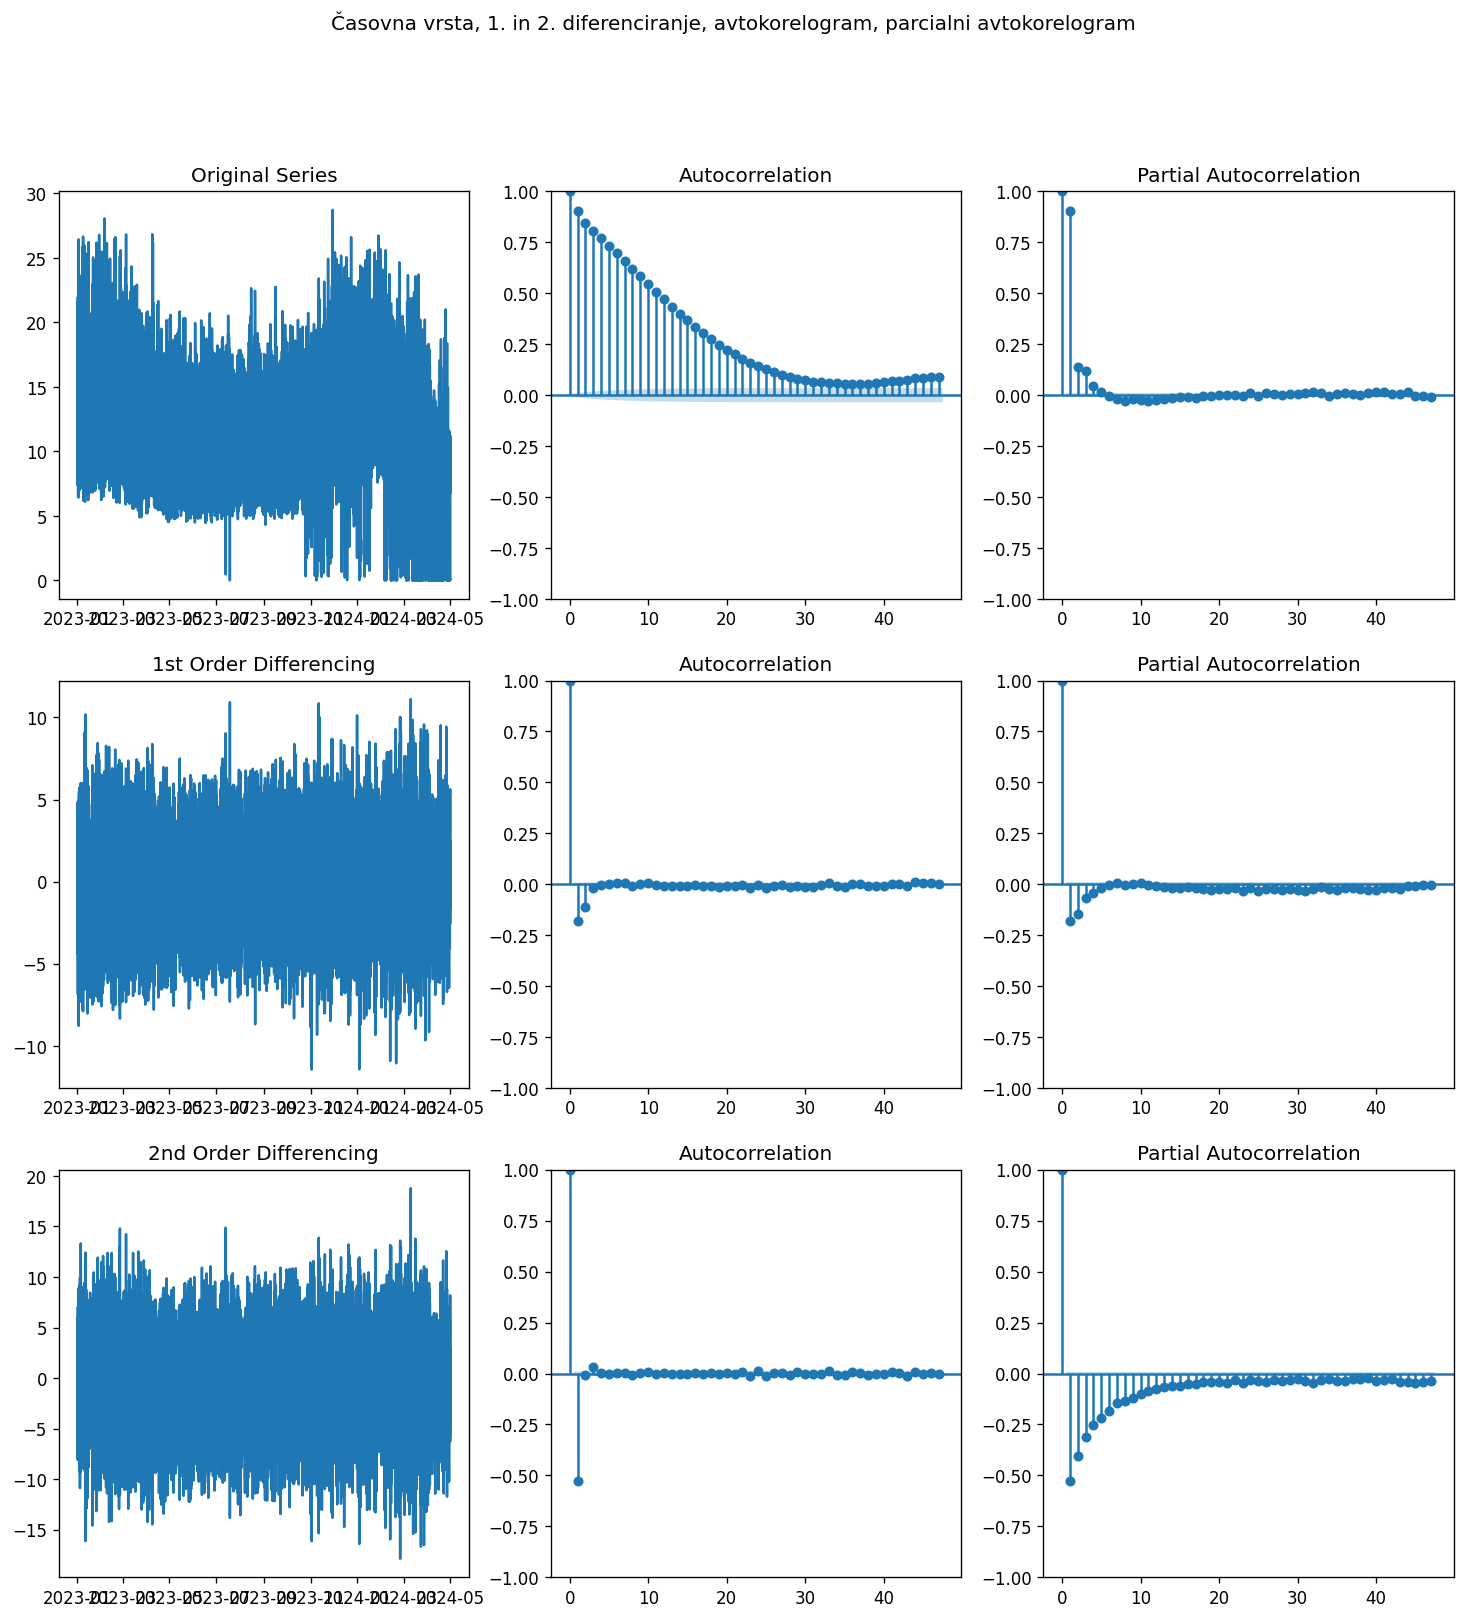

In [25]:
# Original Series
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes[0, 0].plot(data['moc']); 
axes[0, 0].set_title('Original Series')
plot_acf(data['moc'], ax=axes[0, 1])
plot_pacf(data['moc'], ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(data['moc'].diff()); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(data['moc'].diff().dropna(), ax=axes[1, 1])
plot_pacf(data['moc'].diff().dropna(), ax=axes[1, 2])

# 2nd Differencing
axes[2, 0].plot(data['moc'].diff().diff()); 
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data['moc'].diff().diff().dropna(), ax=axes[2, 1])
plot_pacf(data['moc'].diff().diff().dropna(), ax=axes[2, 2])

fig.suptitle('Časovna vrsta, 1. in 2. diferenciranje, avtokorelogram, parcialni avtokorelogram', fontsize=12) 

plt.show()

Text(0.5, 0.98, 'Prikaz podatkov TP BENCINSKI SERVIS 3 2781_A+_401 - MOČ, obdobje 01.02.2023-01.03.2023')

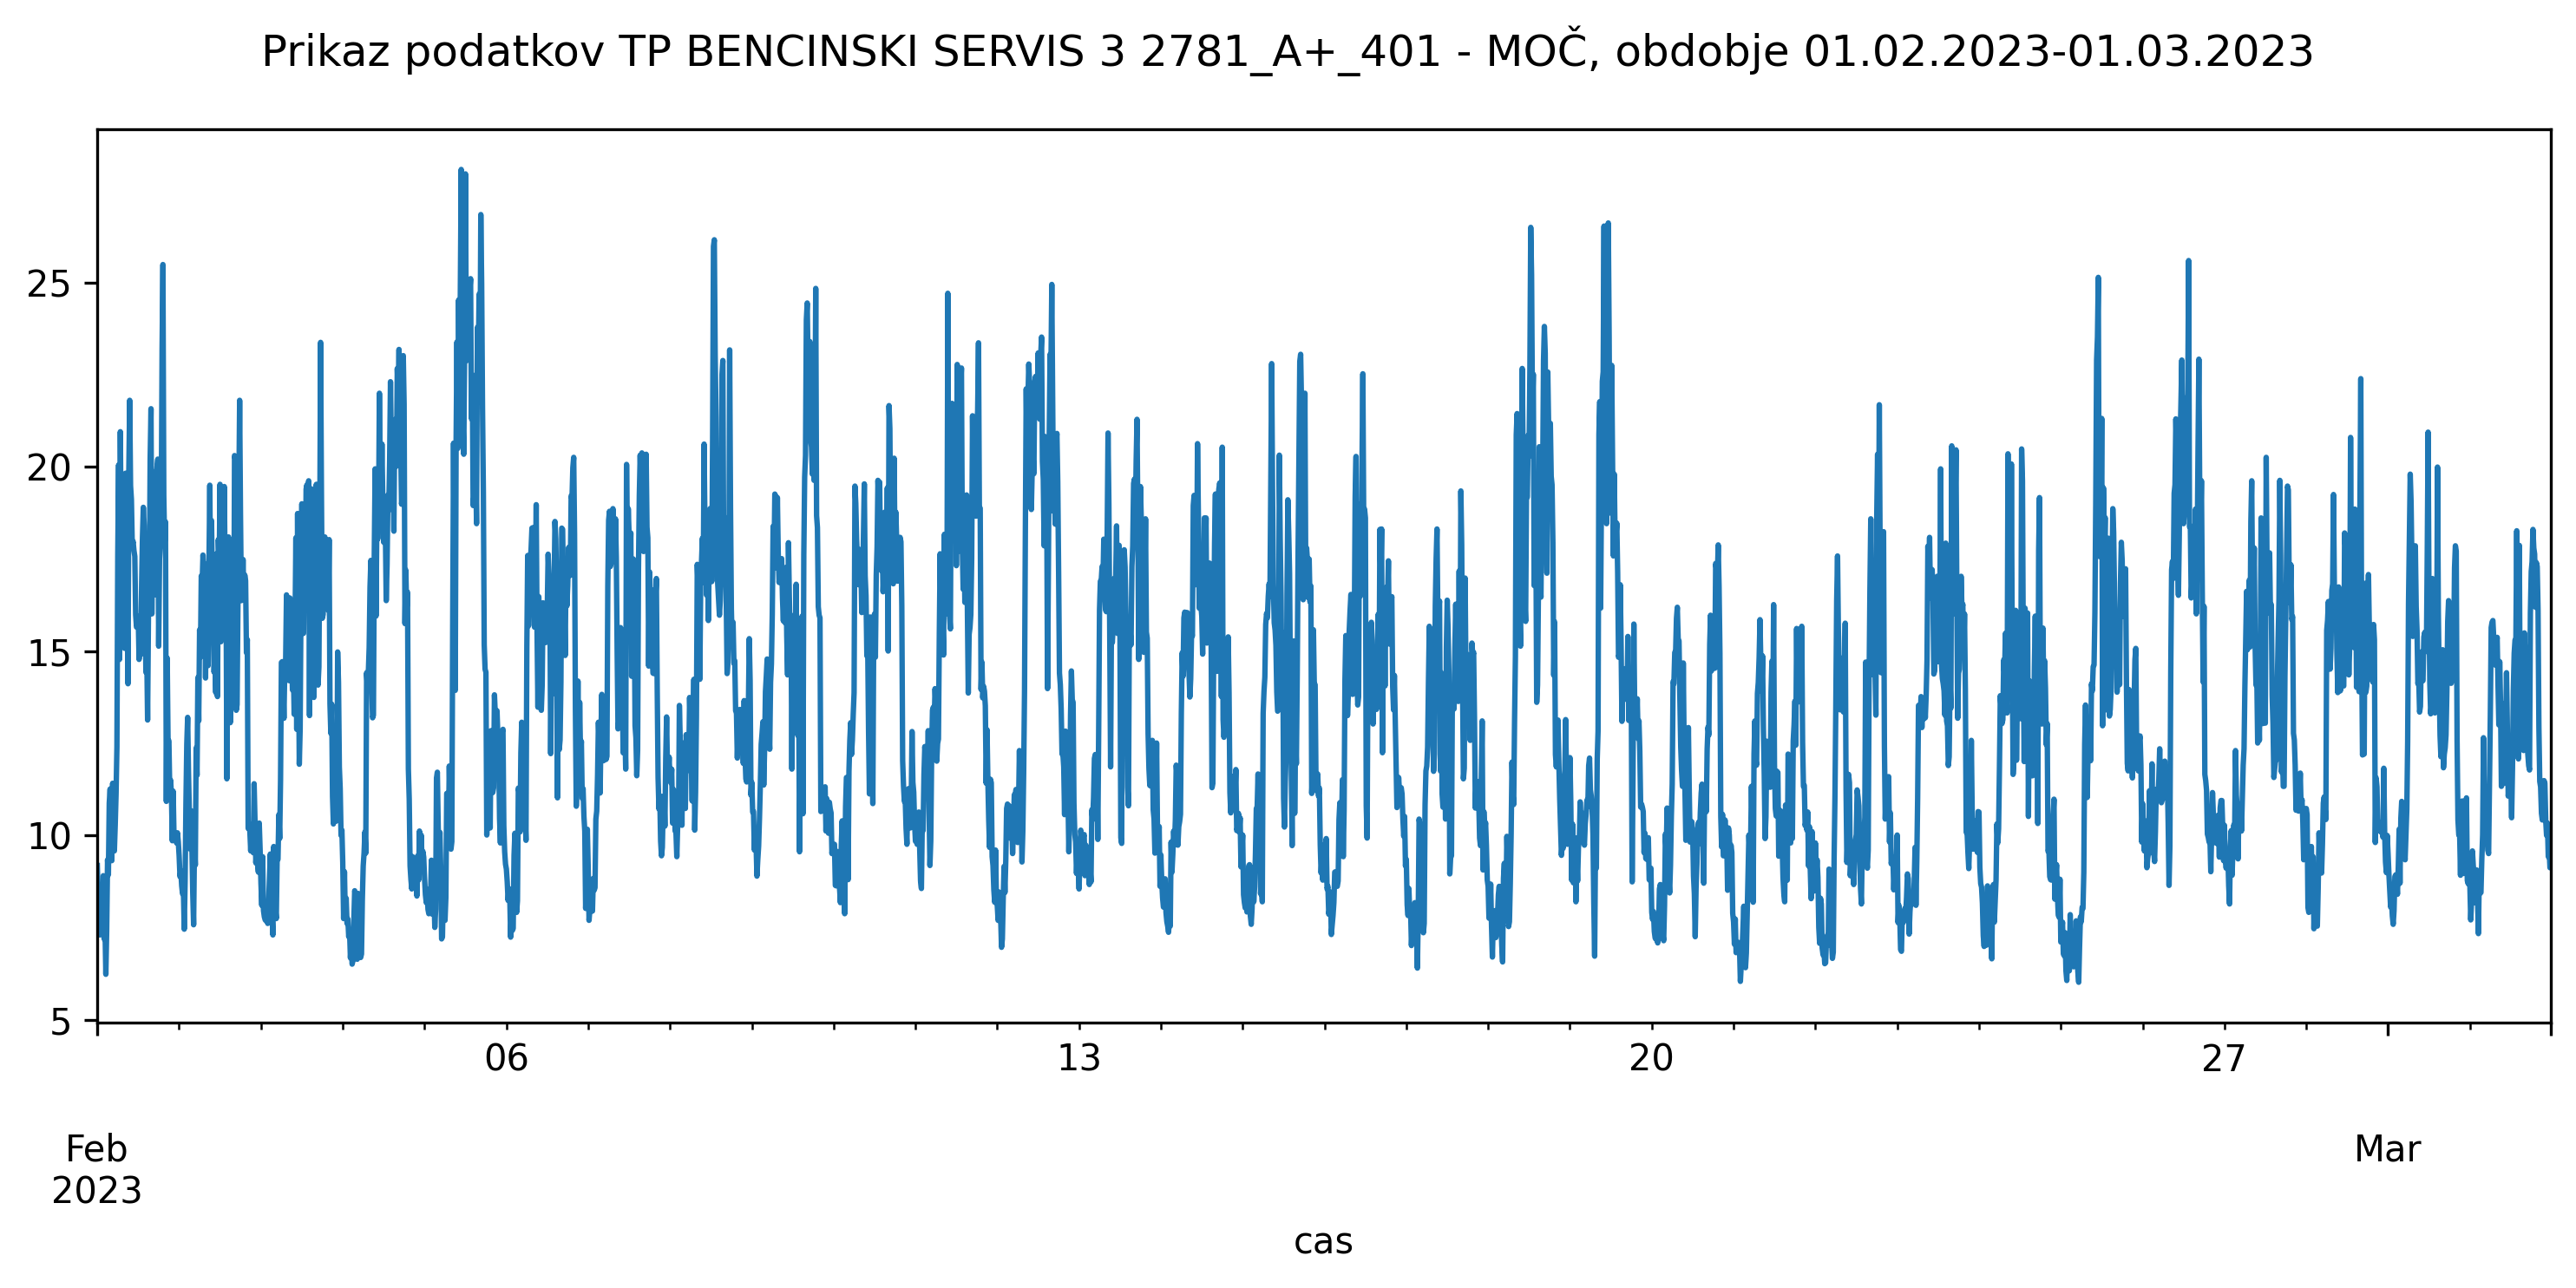

In [9]:
fig = plt.figure(num=None, figsize=(10, 5), dpi=300, tight_layout=True)
y = df['moc']
y.plot()
plt.xlabel('cas')
fig.suptitle('Prikaz podatkov TP BENCINSKI SERVIS 3 2781_A+_401 - MOČ, obdobje 01.02.2023-01.03.2023', fontsize=12)

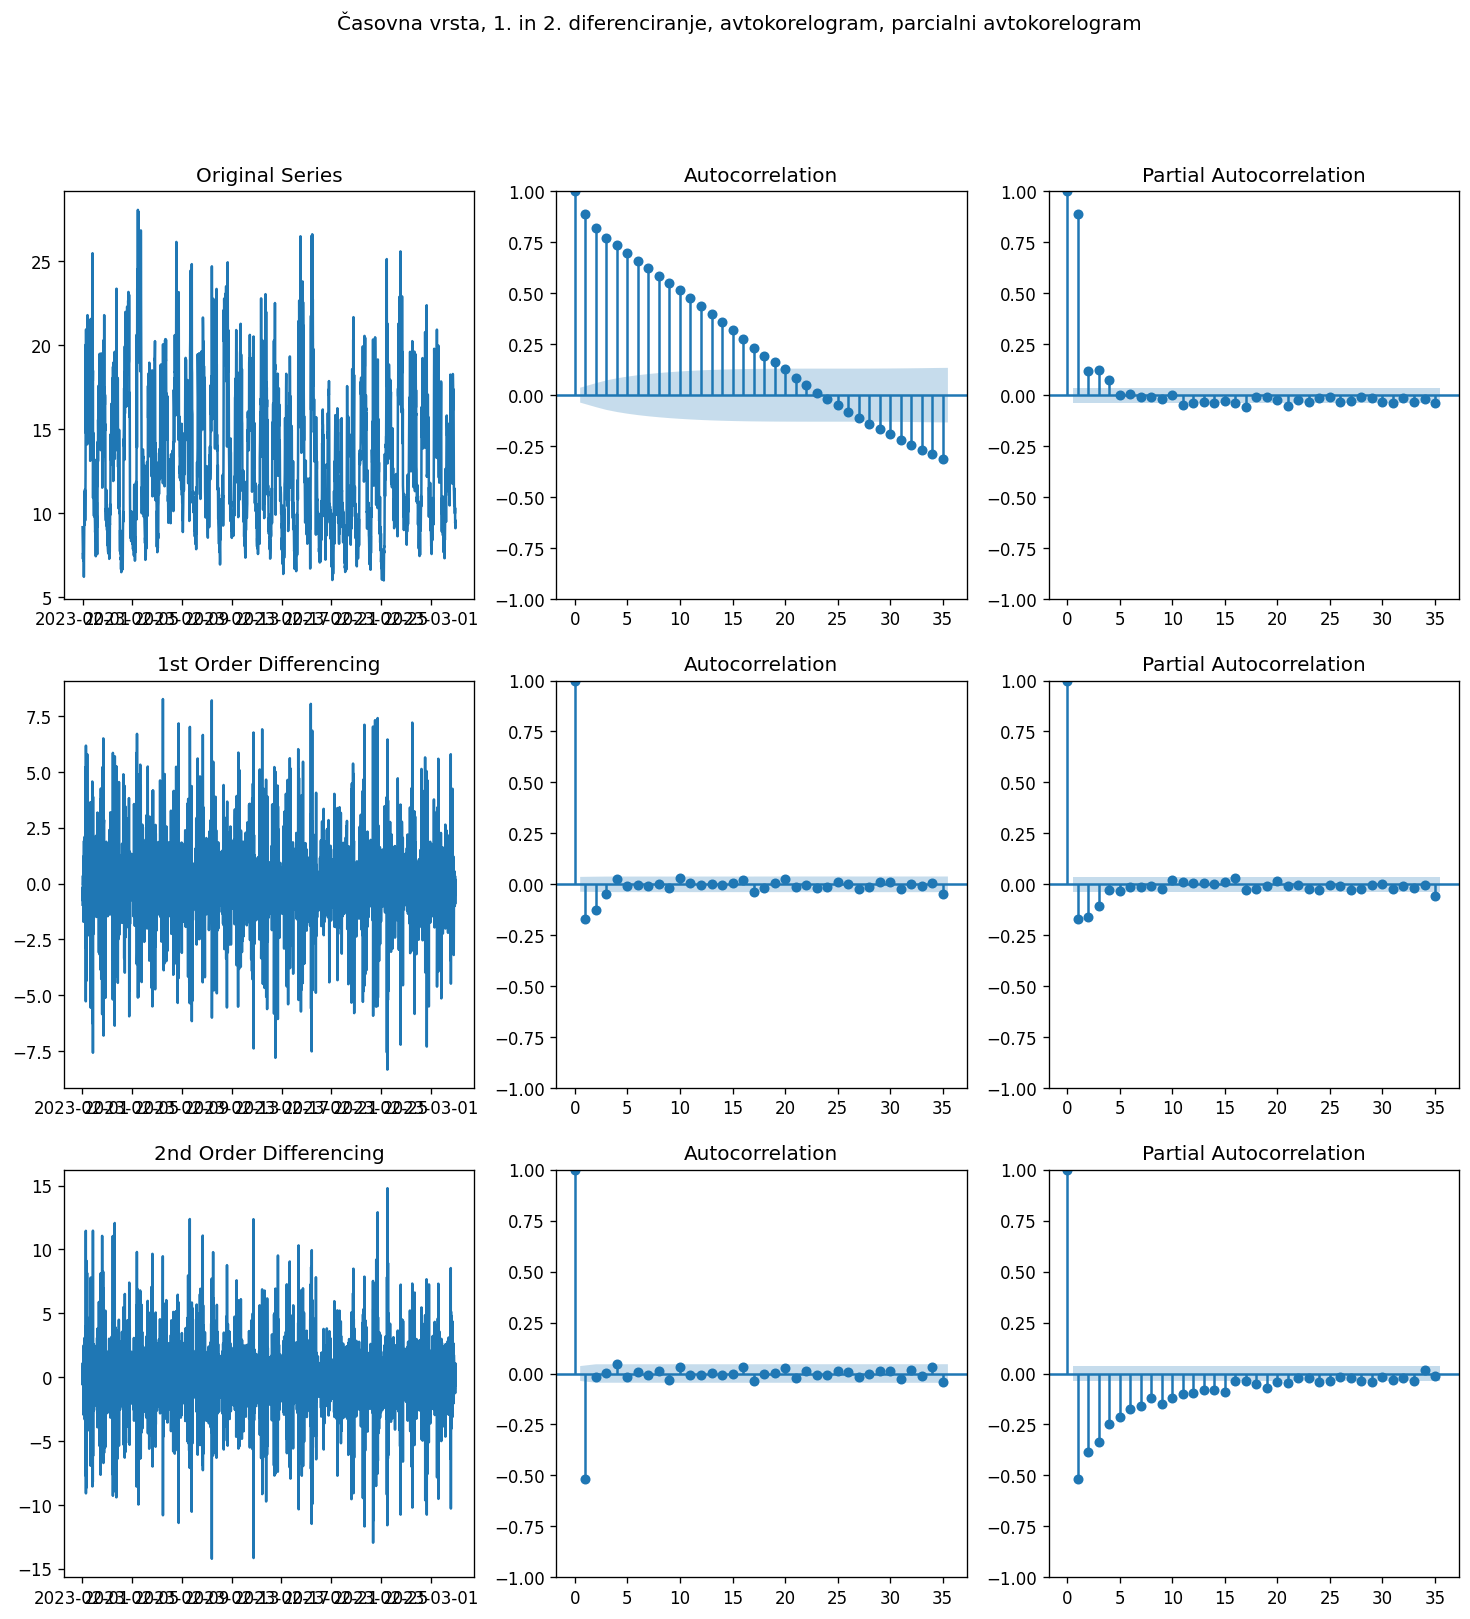

In [20]:
# Original Series
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes[0, 0].plot(df['moc']); 
axes[0, 0].set_title('Original Series')
plot_acf(df['moc'], ax=axes[0, 1])
plot_pacf(df['moc'], ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(df['moc'].diff()); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['moc'].diff().dropna(), ax=axes[1, 1])
plot_pacf(df['moc'].diff().dropna(), ax=axes[1, 2])

# 2nd Differencing
axes[2, 0].plot(df['moc'].diff().diff()); 
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['moc'].diff().diff().dropna(), ax=axes[2, 1])
plot_pacf(df['moc'].diff().diff().dropna(), ax=axes[2, 2])

fig.suptitle('Časovna vrsta, 1. in 2. diferenciranje, avtokorelogram, parcialni avtokorelogram', fontsize=12) 

plt.show()

- vidimo, da koeficienti avtokorelacije padajo počasi - 
- nimamo nihanja oz. periodničnosti koeficientov avtokorelacije

$\Rightarrow$ **prisotnost trenda**

Pri diferenciranju pogledamo, če je potrebno:
- diferenciranje 1. reda: odpravimo linearni trend
- diferenciranje 2. reda: odpravimo kvadratni trend

## MA(q), AR(p)

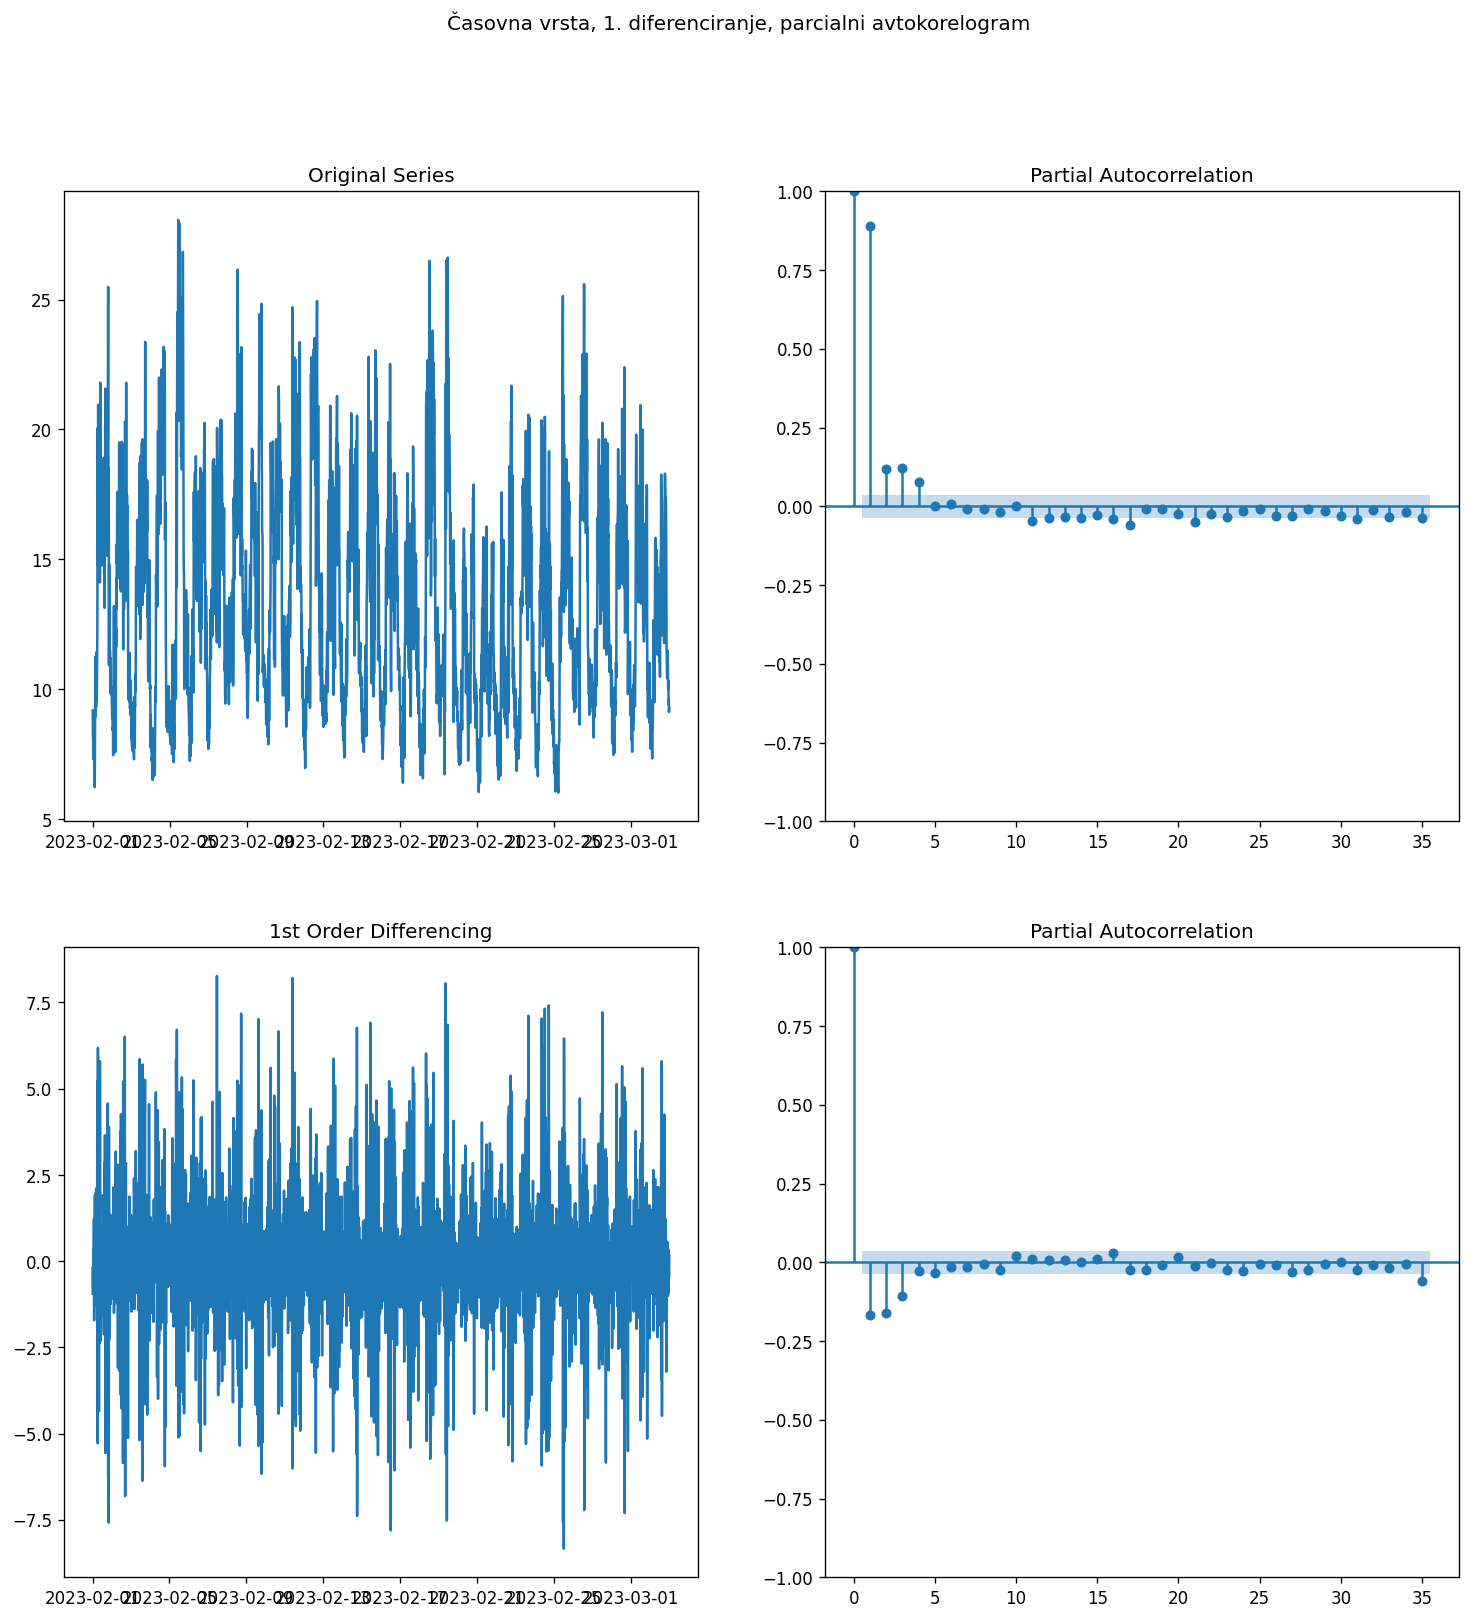

In [27]:
# PACF plot za 1st differenced series
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
axes[0, 0].plot(df['moc']); 
axes[0, 0].set_title('Original Series')
plot_pacf(df['moc'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['moc'].diff()); 
axes[1, 0].set_title('1st Order Differencing')
plot_pacf(df['moc'].diff().dropna(), ax=axes[1, 1])

fig.suptitle('Časovna vrsta, 1. diferenciranje, parcialni avtokorelogram', fontsize=12)

plt.show()

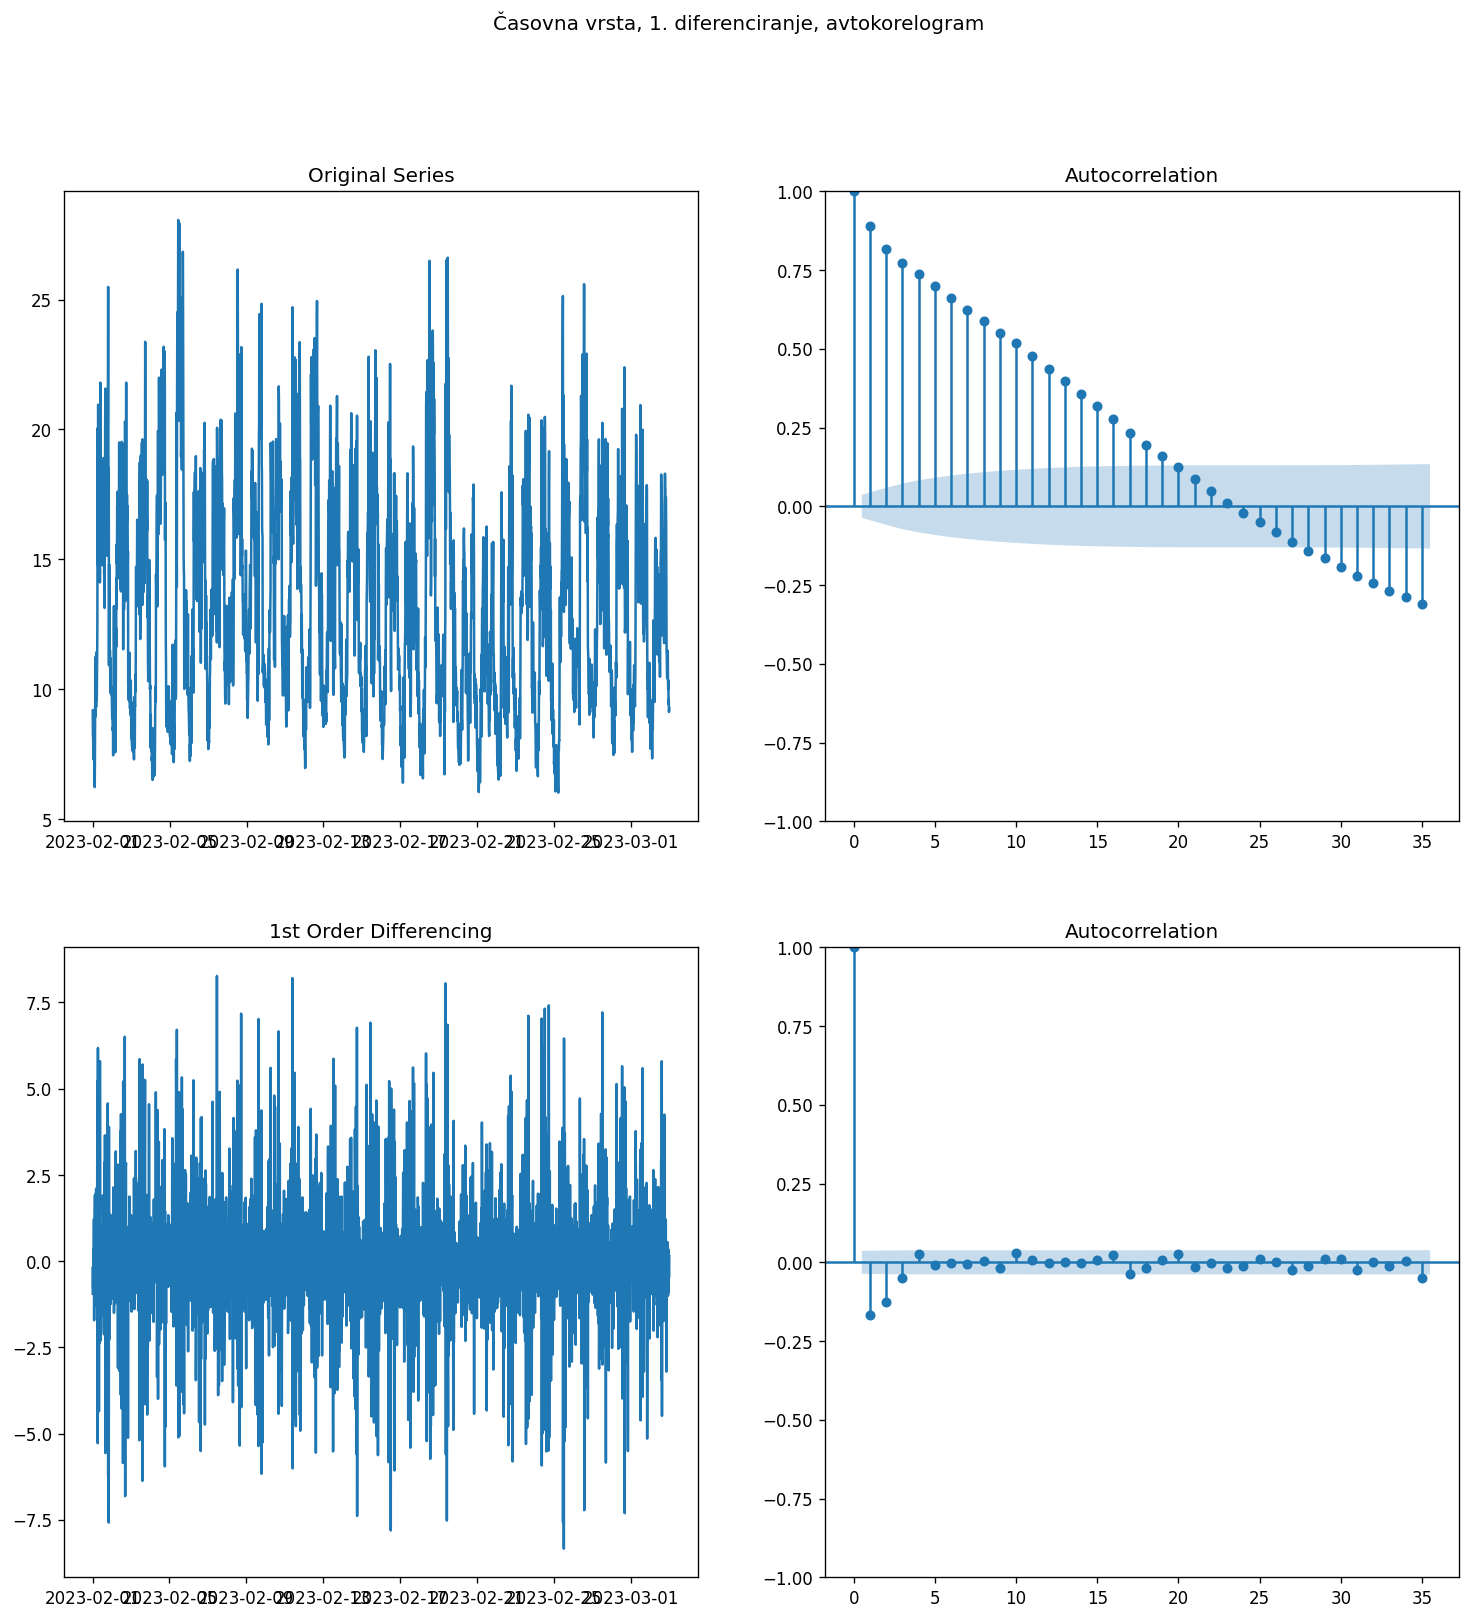

In [28]:
# ACF plot za 1st differenced series
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
axes[0, 0].plot(df['moc']); 
axes[0, 0].set_title('Original Series')
plot_acf(df['moc'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['moc'].diff()); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['moc'].diff().dropna(), ax=axes[1, 1])

fig.suptitle('Časovna vrsta, 1. diferenciranje, avtokorelogram', fontsize=12)

plt.show()

Na podlagi grafov:

$q$ = 3, 4

$p$ = 3

In [62]:
from statsmodels.tsa.arima.model import ARIMA 

# 3,1,3 ARIMA Model
model = ARIMA(df["moc"], order=(3,1,3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    moc   No. Observations:                 2880
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -5887.620
Date:                Fri, 17 May 2024   AIC                          11789.239
Time:                        10:08:25   BIC                          11830.996
Sample:                    02-01-2023   HQIC                         11804.291
                         - 03-02-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2337      0.345     -0.677      0.498      -0.910       0.443
ar.L2         -0.2560      0.256     -1.001      0.317      -0.757       0.245
ar.L3          0.1152      0.140      0.821      0.4

<Axes: title={'center': 'Ostanki ARIMA(3,1,3)'}>

<Figure size 240x240 with 0 Axes>

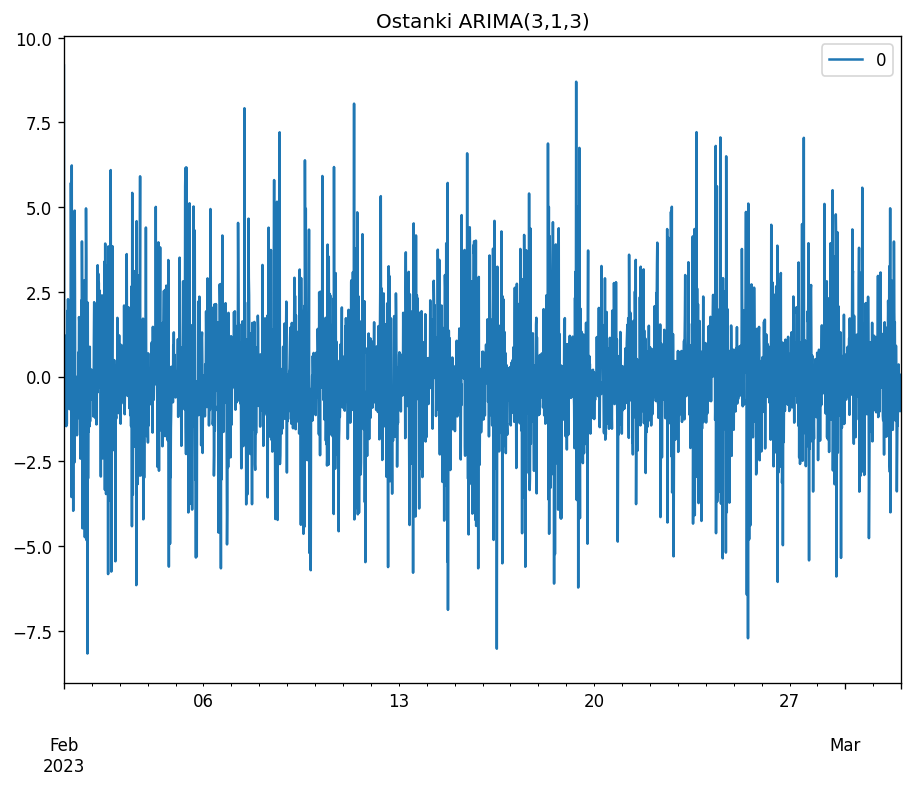

In [63]:
# ostanki
residuals = pd.DataFrame(model_fit.resid)
fig = plt.figure(num=None, figsize=(2, 2))
residuals.plot(title='Ostanki ARIMA(3,1,3)')

In [64]:
# 3,1,4 ARIMA Model
model = ARIMA(df["moc"], order=(3,1,4))
model_fit = model.fit()
print(model_fit.summary())

/Users/nezakrzan/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nezakrzan/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                    moc   No. Observations:                 2880
Model:                 ARIMA(3, 1, 4)   Log Likelihood               -5887.639
Date:                Fri, 17 May 2024   AIC                          11791.278
Time:                        10:08:32   BIC                          11839.000
Sample:                    02-01-2023   HQIC                         11808.479
                         - 03-02-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0526      1.743     -0.030      0.976      -3.469       3.364
ar.L2         -0.1239      0.705     -0.176      0.861      -1.506       1.258
ar.L3          0.0899      0.160      0.562      0.5

<Axes: title={'center': 'Ostanki ARIMA(3,1,4)'}>

<Figure size 3000x1500 with 0 Axes>

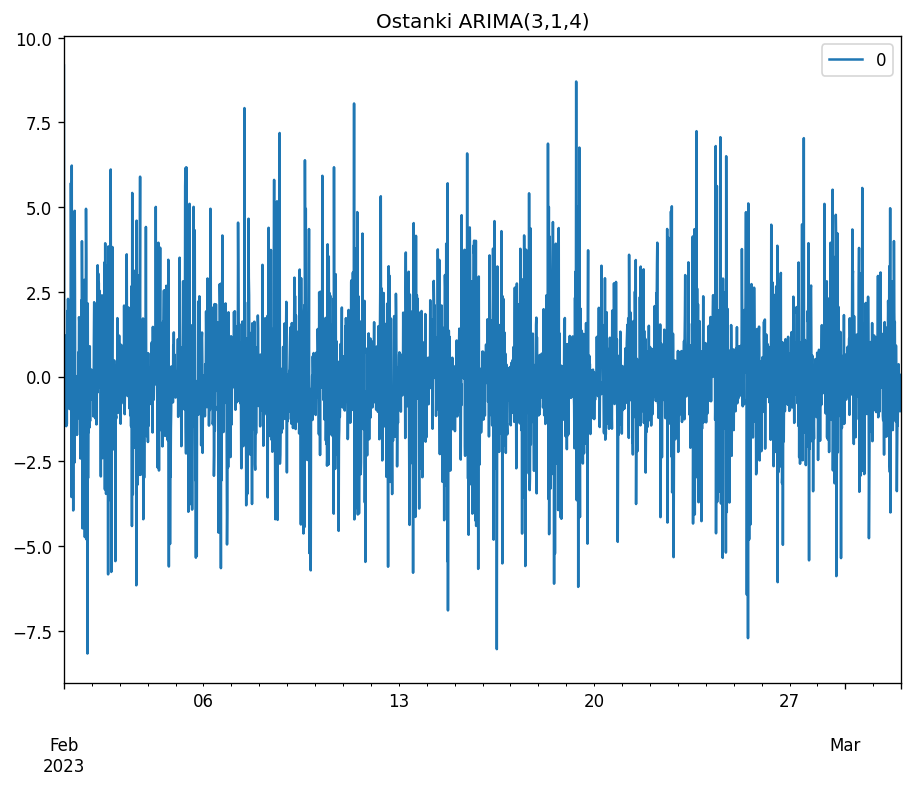

In [65]:
# ostanki
residuals = pd.DataFrame(model_fit.resid)
fig = plt.figure(num=None, figsize=(10, 5), dpi=300, tight_layout=True)
residuals.plot(title='Ostanki ARIMA(3,1,4)')

In [66]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'